# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [108]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [109]:
from pprint import pprint
import json
import datetime as dt

In [110]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = dt.date.fromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | serebryanyye prudy
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | floro
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | sinabang
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | fauske
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | calvinia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | tofol
Processing

Processing Record 38 of Set 4 | kimbe
Processing Record 39 of Set 4 | chibougamau
Processing Record 40 of Set 4 | susuman
Processing Record 41 of Set 4 | whistler
Processing Record 42 of Set 4 | marka
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | cestos city
Processing Record 45 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 46 of Set 4 | arkhangel'sk
Processing Record 47 of Set 4 | tindouf
Processing Record 48 of Set 4 | acarau
Processing Record 49 of Set 4 | thetford-mines
Processing Record 0 of Set 5 | magadi
Processing Record 1 of Set 5 | laayoune
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | petropavlovsk-kamchatsky
Processing Record 4 of Set 5 | wynyard
Processing Record 5 of Set 5 | sulingen
Processing Record 6 of Set 5 | knivsta
Processing Record 7 of Set 5 | fortaleza
Processing Record 8 of Set 5 | happy valley-goose bay
Processing Record 9 of Set 5 | kapa'a
Processing Record 10 of Set 5 | aral
Processing

Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | newnham
Processing Record 34 of Set 8 | rouissat
Processing Record 35 of Set 8 | bayanhongor
Processing Record 36 of Set 8 | labuan
Processing Record 37 of Set 8 | mokhsogollokh
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | callao
Processing Record 40 of Set 8 | boyalik
Processing Record 41 of Set 8 | cochin
Processing Record 42 of Set 8 | staraya kulatka
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | fale old settlement
Processing Record 45 of Set 8 | coron
Processing Record 46 of Set 8 | kerikeri
Processing Record 47 of Set 8 | karungdong
Processing Record 48 of Set 8 | winburg
Processing Record 49 of Set 8 | firebaugh
Processing Record 0 of Set 9 | poronaysk
Processing Record 1 of Set 9 | sao joao da barra
Processing Record 2 of Set 9 | serowe
Processing Record 3 of Set 9 | eraan
Processing Record 4 of Set 9 | tyukhtet
Proce

In [111]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [112]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-1.72,93,75,1.00,RU,2023-11-01
1,adamstown,-25.0660,-130.1015,22.89,73,1,7.04,PN,2023-11-01
2,hamilton,39.1834,-84.5333,5.95,59,5,0.45,US,2023-11-01
3,serebryanyye prudy,54.4692,38.7210,12.55,89,94,3.87,RU,2023-11-01
4,ola,59.5833,151.2833,1.19,95,100,4.81,RU,2023-11-01


In [113]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [114]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-1.72,93,75,1.00,RU,2023-11-01
1,adamstown,-25.0660,-130.1015,22.89,73,1,7.04,PN,2023-11-01
2,hamilton,39.1834,-84.5333,5.95,59,5,0.45,US,2023-11-01
3,serebryanyye prudy,54.4692,38.7210,12.55,89,94,3.87,RU,2023-11-01
4,ola,59.5833,151.2833,1.19,95,100,4.81,RU,2023-11-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

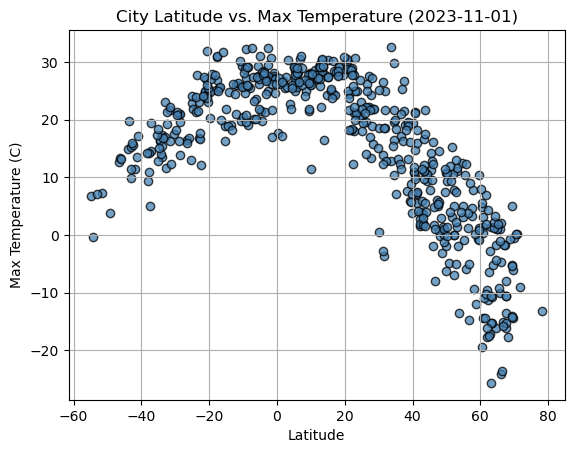

In [115]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors="steelblue",alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({dt.date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

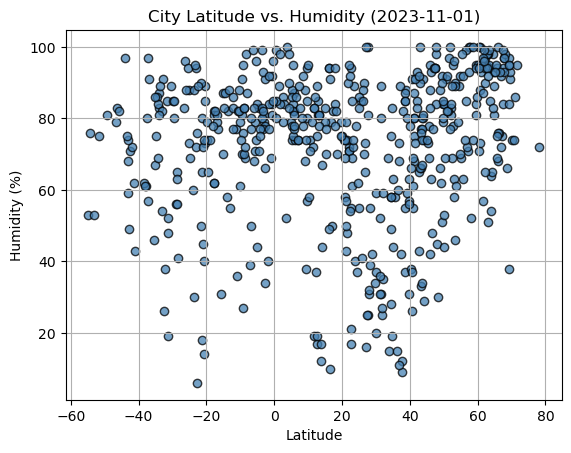

In [145]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolors="steelblue",alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity ({dt.date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

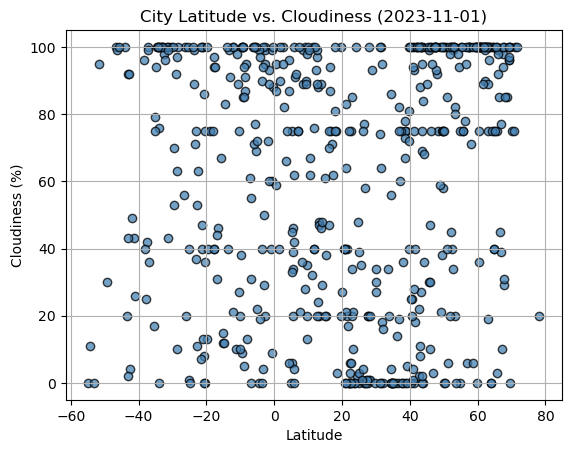

In [117]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors="steelblue",alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness ({dt.date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

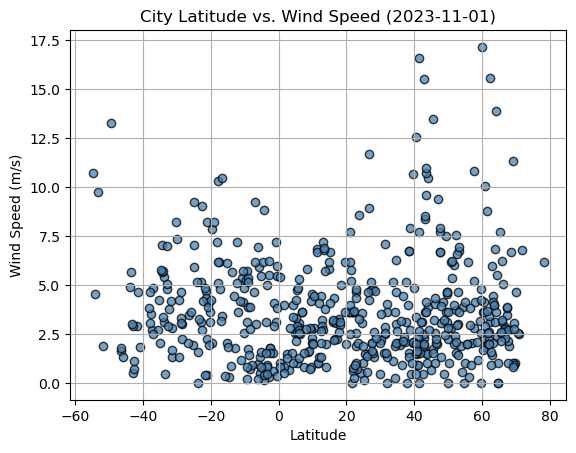

In [118]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors="steelblue",alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed ({dt.date.today()})")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
def plotregress(x_values, y_values, x_loc=0, y_loc=0, x_label="", y_label="", title=""):
    plt.scatter(x_values,y_values,facecolors="steelblue",alpha=0.75, edgecolors="black")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc, y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    return slope, intercept, rvalue, pvalue, stderr

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-1.72,93,75,1.00,RU,2023-11-01
2,hamilton,39.1834,-84.5333,5.95,59,5,0.45,US,2023-11-01
3,serebryanyye prudy,54.4692,38.7210,12.55,89,94,3.87,RU,2023-11-01
4,ola,59.5833,151.2833,1.19,95,100,4.81,RU,2023-11-01
5,floro,61.5996,5.0328,6.98,57,100,8.75,NO,2023-11-01


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.89,73,1,7.04,PN,2023-11-01
6,grytviken,-54.2811,-36.5092,-0.41,76,11,4.54,GS,2023-11-01
8,ushuaia,-54.8000,-68.3000,6.81,53,0,10.73,AR,2023-11-01
14,calvinia,-31.4707,19.7760,21.66,19,100,2.80,ZA,2023-11-01
20,port-aux-francais,-49.3500,70.2167,3.79,81,30,13.28,TF,2023-11-01


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7615770273062995


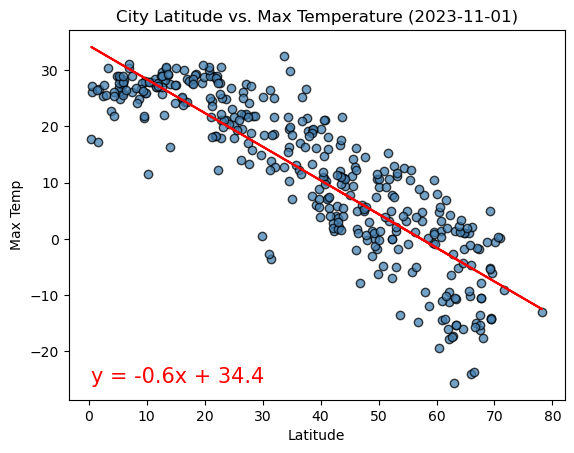

In [128]:
# Linear regression on Northern Hemisphere
plotregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].min(), "Latitude", "Max Temp", f"City Latitude vs. Max Temperature ({dt.date.today()})")
plt.show()

The r-squared is: 0.6039685198759082


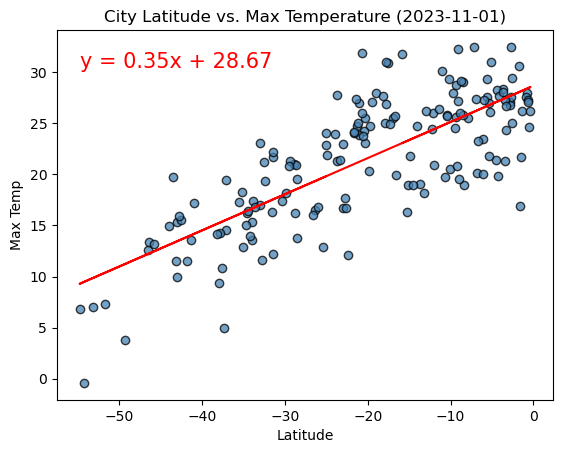

In [129]:
# Linear regression on Southern Hemisphere
plotregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], southern_hemi_df["Lat"].min(), southern_hemi_df["Max Temp"].max()-2, "Latitude", "Max Temp", f"City Latitude vs. Max Temperature ({dt.date.today()})")
plt.show()

**Discussion about the linear relationship:** 

-The Max Temp has a sinusoidal dependence on Latitude as expected, peaking in the equator with a small offset towards the North hemisphere due to the earths tilt and since we just came out of summer.

-In each hemistphere though we can approximate with a piecewise linear fit.

-The south hemisphere appears to have a worst fit, but this might be due to the narrower latitude range and the reduced sample size in the south hemisphere. On paper northern hemisphere fit is good, but I find both being marginal

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0423863204568237


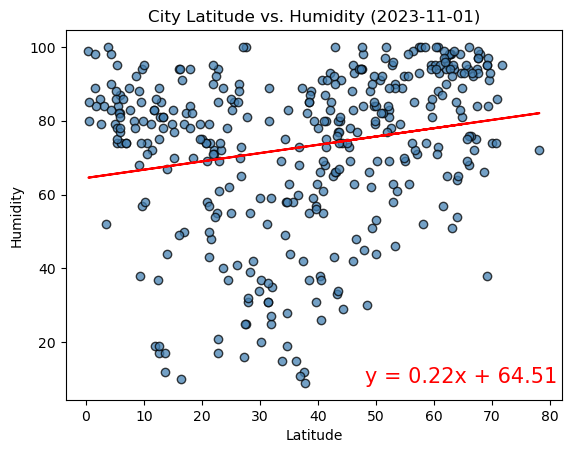

In [130]:
# Northern Hemisphere
plotregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], northern_hemi_df["Lat"].max()-30, northern_hemi_df["Humidity"].min(), "Latitude", "Humidity", f"City Latitude vs. Humidity ({dt.date.today()})")
plt.show()

The r-squared is: 0.021942426659566104


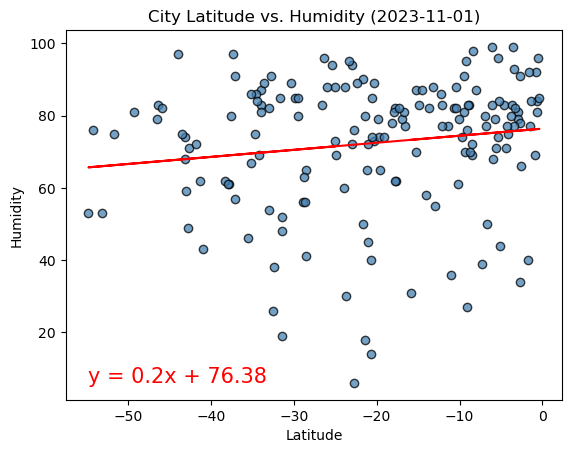

In [131]:
# Southern Hemisphere
plotregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].min(), "Latitude", "Humidity", f"City Latitude vs. Humidity ({dt.date.today()})")
plt.show()

**Discussion about the linear relationship:** 

-There is no meaningful linear fit here on both hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0624233674624972


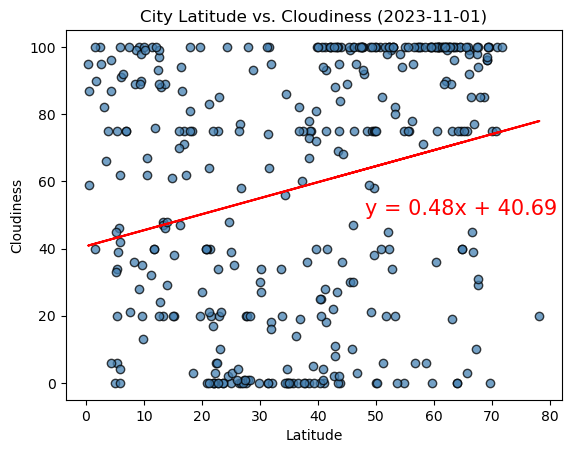

In [140]:
# Northern Hemisphere
plotregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"].max()-30, northern_hemi_df["Cloudiness"].min()+50, "Latitude", "Cloudiness", f"City Latitude vs. Cloudiness ({dt.date.today()})")
plt.show()

The r-squared is: 0.000615087976852347


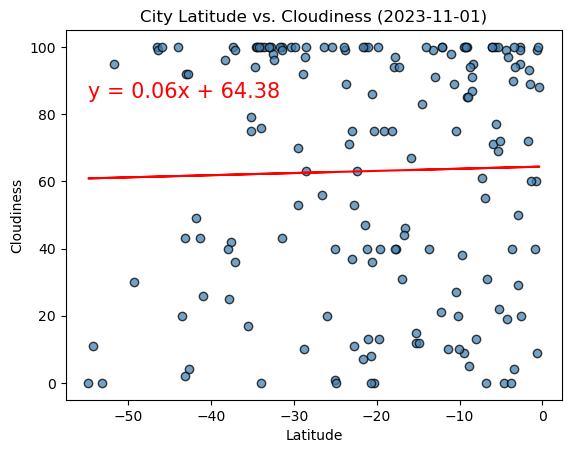

In [139]:
# Southern Hemisphere
plotregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].max()-15, "Latitude", "Cloudiness", f"City Latitude vs. Cloudiness ({dt.date.today()})")
plt.show()

**Discussion about the linear relationship:** 

-There is no meaningful linear fit here on both hemispheres

-There is a collection of cities with 100% Humidity and 0% and the rest appears somewhat arbitrary if we only look at latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.014072055498073168


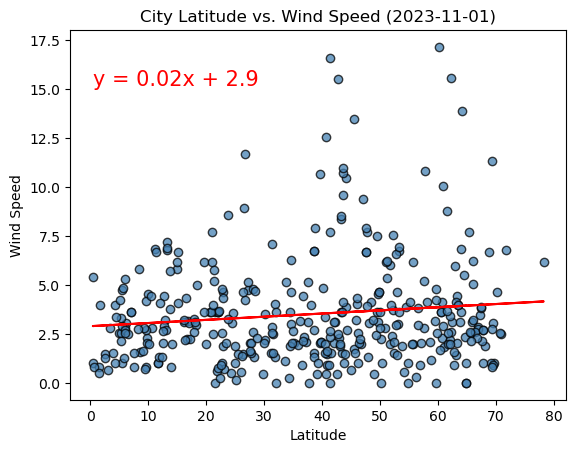

In [134]:
# Northern Hemisphere
plotregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].max()-2, "Latitude", "Wind Speed", f"City Latitude vs. Wind Speed ({dt.date.today()})")
plt.show()

The r-squared is: 0.019860452350024392


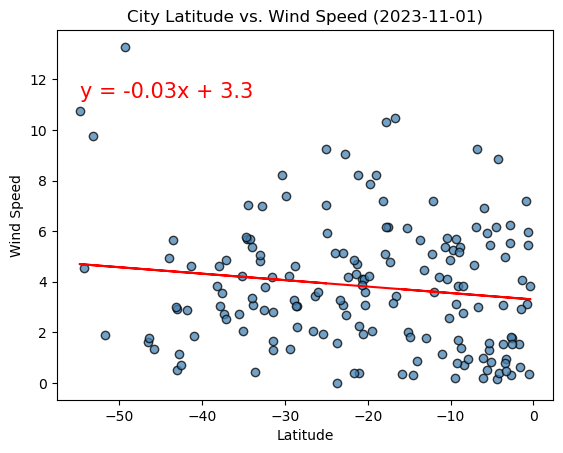

In [135]:
# Southern Hemisphere
plotregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].max()-2, "Latitude", "Wind Speed", f"City Latitude vs. Wind Speed ({dt.date.today()})")
plt.show()

**Discussion about the linear relationship:** 

-Likewise the analysis here does not provide any good fit or further understanding of the data. More analysis would be needed to understand the trends